In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("student.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X = df.drop(columns = ["math_score"],axis = 1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
Y = df["math_score"]
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
numeric_features = X.select_dtypes(exclude = "object").columns
categoric_features = X.select_dtypes(include = "object").columns

In [7]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",one_hot_transformer,categoric_features),
        ("StandardScaler",numeric_transformer,numeric_features),
    ]
)

In [8]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [9]:
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
def evaluate_model (true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [12]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Catboost Regressor" : CatBoostRegressor(verbose = False),
    "Adaboost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(Y_train,Y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(Y_test,Y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on Training set:")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("---------------------------------------")

    print("Model performance on Testing set:")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('=' * 35)
    print("\n")


Linear Regression
Model performance on Training set:
- Root Mean Squared Error: 5.3293
- Mean Absolute Error: 4.2715
- R2 Score: 0.8740
---------------------------------------
Model performance on Testing set:
- Root Mean Squared Error: 5.4252
- Mean Absolute Error: 4.2222
- R2 Score: 0.8790


Lasso
Model performance on Training set:
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------------------
Model performance on Testing set:
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance on Training set:
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
---------------------------------------
Model performance on Testing set:
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K Neighbors Regressor
Model performance on Training set:
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
5,Random Forest Regressor,0.855606
7,Catboost Regressor,0.851632
8,Adaboost Regressor,0.851566
1,Lasso,0.825320
6,XGB Regressor,0.821589
3,K Neighbors Regressor,0.783813
4,Decision Tree,0.745231


In [14]:
LR = LinearRegression(fit_intercept = True)
LR = LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.90


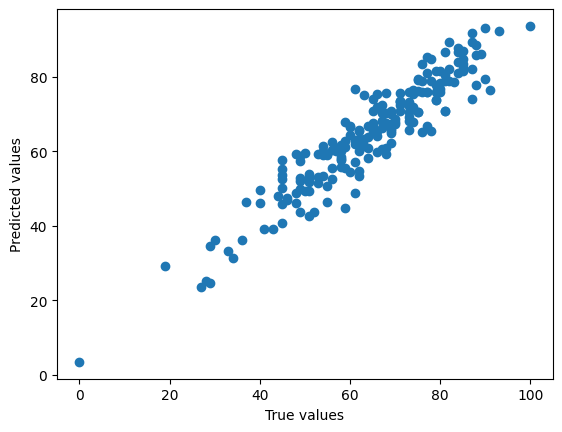

In [15]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

<Axes: xlabel='math_score'>

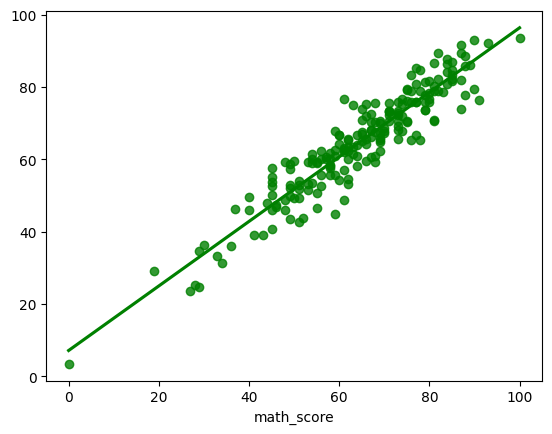

In [16]:
sns.regplot(x = Y_test,y = Y_pred,ci = None,color = "green")